# CreditCard dataset exploration and fraud prediction by D. Zerah

In [2]:
# Let import the libraries !
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing, grid_search, metrics, linear_model, neighbors, svm, ensemble
from sklearn.metrics import accuracy_score

## Classification of the datas by Pandas DataFrame

In [3]:
df_card = pd.read_csv('creditcard.csv')

In [4]:
df_card.head(40)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
print(df_card.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
## Number of Fraud ? 
dataCounts = df_card.Class.value_counts(dropna=True);
print(dataCounts); ## Lets throw NaN values
print("So here the final : ", dataCounts[1]/dataCounts[0] * 100, "% of Credit Card Fraud");

0    284315
1       492
Name: Class, dtype: int64
So here the final :  0.173047500132 % of Credit Card Fraud


In [7]:
## Amount of the transaction
print("From a total amount of : ", df_card.Amount.sum(), "€");
print("Which represents ", df_card.Amount.sum() / (dataCounts[1]+dataCounts[0]) , "€ per person");

From a total amount of :  25162590.009983554 €
Which represents  88.3496192509 € per person


## First Step : Analyze it 

In [8]:
# Deleting some datas ? Time ? Vi ? Amount ? Class ? 
# Lets delete Vi 


print("Lets try to find a correlation between the proven fraud");
dataFraud = df_card[df_card.Class==1];
data_Fraud = dataFraud.drop(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 
                            'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 
                             'V27', 'V28'],
                            axis=1)
print(data_Fraud);

Lets try to find a correlation between the proven fraud
            Time   Amount  Class
541        406.0     0.00      1
623        472.0   529.00      1
4920      4462.0   239.93      1
6108      6986.0    59.00      1
6329      7519.0     1.00      1
6331      7526.0     1.00      1
6334      7535.0     1.00      1
6336      7543.0     1.00      1
6338      7551.0     1.00      1
6427      7610.0     1.00      1
6446      7672.0     1.00      1
6472      7740.0     1.00      1
6529      7891.0     1.00      1
6609      8090.0     1.00      1
6641      8169.0     1.00      1
6717      8408.0     1.00      1
6719      8415.0     1.00      1
6734      8451.0     1.00      1
6774      8528.0     1.00      1
6820      8614.0     1.00      1
6870      8757.0     1.00      1
6882      8808.0     1.10      1
6899      8878.0     1.00      1
6903      8886.0     1.00      1
6971      9064.0  1809.68      1
8296     11080.0     1.00      1
8312     11092.0     1.00      1
8335     11131.0    

### Amount Correlation ?

It's very hard to understand it because there's too many values.. Lets remove values that < 500


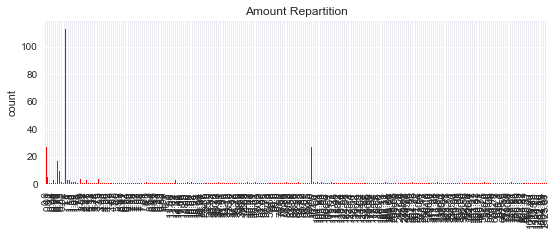

In [9]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(9, 3))
subplt = data_Fraud['Amount'].value_counts().sort_index().plot(kind='bar', color='red')
subplt.set_title('Amount Repartition')
subplt.set_ylabel('count')
print("It's very hard to understand it because there's too many values.. Lets remove values that < 500")


We can noticed than only values between 0 and 100 are important, the rest are useless, lets split the datas
The card Fraud are for Amounts between 0 and 100 euros


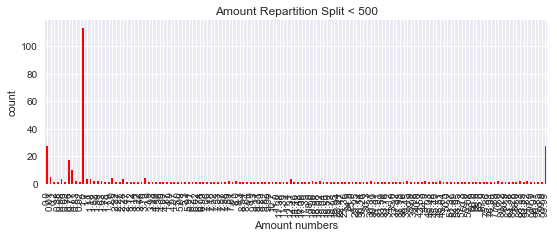

In [10]:
# Let plot it
#print(data_Fraud[(data_Fraud.Amount < 120) & (data_Fraud.Amount > 80)]['Amount'].value_counts().sort_index())
print("We can noticed than only values between 0 and 100 are important, the rest are useless, lets split the datas")
fig = plt.subplots(nrows=1, ncols=1, figsize=(9, 3))
subplt = data_Fraud[(data_Fraud.Amount < 100)]['Amount'].value_counts().sort_index().plot(kind='bar', color='red')
subplt.set_title('Amount Repartition Split < 500')
subplt.set_ylabel('count')
subplt.set_xlabel('Amount numbers')
print("The card Fraud are for Amounts between 0 and 100 euros")

### Time correlation 

            Time
541        406.0
6108      6986.0
6329      7519.0
6331      7526.0
6334      7535.0
6336      7543.0
6338      7551.0
6427      7610.0
6446      7672.0
6472      7740.0
6529      7891.0
6609      8090.0
6641      8169.0
6717      8408.0
6719      8415.0
6734      8451.0
6774      8528.0
6820      8614.0
6870      8757.0
6882      8808.0
6899      8878.0
6903      8886.0
8296     11080.0
8312     11092.0
8335     11131.0
8615     11629.0
8617     11635.0
8842     12093.0
8845     12095.0
9035     12597.0
...          ...
248971  154181.0
249607  154493.0
249828  154599.0
249963  154657.0
250761  155054.0
251477  155359.0
251866  155535.0
251881  155542.0
251891  155548.0
251904  155554.0
252124  155662.0
252774  155965.0
254395  156710.0
255403  157207.0
255556  157284.0
261056  159844.0
261473  160034.0
262560  160537.0
262826  160665.0
263080  160791.0
263274  160870.0
263877  161154.0
268375  163181.0
272521  165132.0
274382  165981.0
274475  166028.0
276071  166883

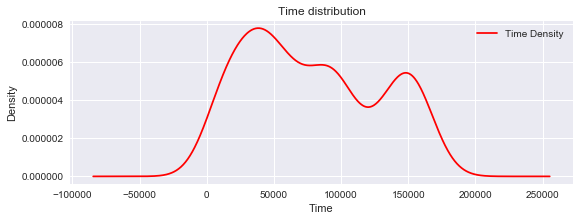

In [11]:
 newDfTime = data_Fraud[data_Fraud.Amount < 100].drop(['Amount', 'Class'], axis=1); #Only Fraud Class
print(newDfTime);
plt.figure(figsize=(9,3))
newDfTime['Time'].plot(kind='density', label='Time Density', color = 'Red')
plt.xlabel('Time')
plt.legend()
plt.title('Time distribution')

In [12]:
print("The mostly card fraud are located between 25000 and 100 000");

The mostly card fraud are located between 25000 and 100 000


### Amount and Time

In [13]:
finalInteresstedData = data_Fraud[(data_Fraud.Amount < 100) & (data_Fraud.Time < 100000) & (data_Fraud.Time > 25000)];

# Extracting a test sample 

In [14]:
df_test = df_card[(df_card.Time > 93800)]; ## Only interested data where we can find some Fraud
df_test = df_test.drop(df_test.index[600:])
df_test.index = df_test.index - 150634; 
df_test.to_csv('card_test.csv', index=False)

In [15]:
X = df_card.iloc[:,[0,29]]
y = df_card[df_card.columns[30]] #Fraud or not ? 
X_test = df_test.iloc[:,[0,29]]


### Logistic Regression

In [16]:
# Finding optimal parameters of the classifier
param_grid = {
              'C': [0.01, 0.05, 0.1, 0.5, 1], 
              'penalty': ['l1', 'l2']
             }
estimator = linear_model.LogisticRegression()
lr_gs = grid_search.GridSearchCV(estimator, param_grid, cv=4) ## test
lr_gs.fit(X, y) ## test
#l1, l2 corrections 

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [17]:
lr_estimator = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)
# C : pour lancer la régression et l1

{'C': 0.01, 'penalty': 'l1'}
0.9982725143693799


### Predict and submit

In [22]:
X_test = df_test.iloc[:,[0,29]]
time_id = df_test[['Time']]
amount_id = df_test[['Amount']]
result_df = pd.DataFrame(columns=['Time', 'Amount', 'Class']) 
result_df.Time = time_id
result_df.Amount = amount_id

### Which estimator gives us the best accurancy ?

#### Logistic Regression

In [23]:
y_test_lr = lr_estimator.predict(X_test);
result_df.Class = y_test_lr
result_df.head()

,Time,Amount,Class
0,93802.0,31.76,0
1,93804.0,70.11,0
2,93806.0,5.37,0
3,93810.0,61.61,0
4,93810.0,15.00,0


In [25]:
y_true = df_test[df_test.columns[30]] #Fraud or not ? 
true_df = pd.DataFrame(columns=['Time', 'Amount', 'Class']) 
true_df.Time = time_id
true_df.Amount = amount_id
true_df.Class = y_true;
true_df.head()
accuracy_score(y_true, y_test_lr)

0.95166666666666666

## Copying in Excel 

In [ ]:
df_card.to_csv('card_results.csv', index=False)